# IPL WINNER PREDICTION

**Summary:**
1. Introduction
    - 1.1. Problem statement
    - 1.2. Instruction
    - 1.3. Reading Data
    - 1.4. Data description
2. Individual table analyse
    - 2.1. 'Matches' table analysis 
    - 2.2. 'Delivaries' table analysis
3. Table merging 
    - 3.1. Concatenate Matchs and Deliveries table
    - 3.2. Aggregate table by id
    - 3.3. Seggregating Innings
    - 3.4. Merge Innings 1 and 2
    - 3.5. Calculating Run rate and Net run rate
4. Basic Analysis
    - 4.1. City 
    - 4.2. Season
    - 4.3. Player of the match
    - 4.4. Season Vs Winner
    - 4.5. Season Vs winner Vs First batting net run rate
5. Label and Ordinal Encoding
6. Feature scaling - Standardization
7. Data split - Train test split
8. Model building [Decision tree, Random forest, KNN]  
9. Hyper-parameter tuning
10. Model performance score - Confusion matrix
11. Conclusion

### 1.1. Problem statement: 
 - **Predict the winner for the next year of the IPL using the ML Algorithms.**


### 1.2. Instructions: 
1.	The Model should be trained with 80:20 as training and test dataset.
2.	Accuracy should be calculated using the test dataset.
3.	Code should be well commented and delivered as a Jupyter Notebook

In [3]:
#Importing required libraries
#Data preprocessing
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Data Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#train test split
from sklearn.model_selection import train_test_split

#importing classification Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

### 1.3. Reading data files

In [4]:
#Reading the file
df1=pd.read_excel('matches.xlsx')
df2 = pd.read_excel('deliveries.xlsx')

### 1.4. Data Description

In [5]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
df1.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               636 non-null    int64         
 1   season           636 non-null    int64         
 2   city             629 non-null    object        
 3   date             636 non-null    datetime64[ns]
 4   team1            636 non-null    object        
 5   team2            636 non-null    object        
 6   toss_winner      636 non-null    object        
 7   toss_decision    636 non-null    object        
 8   result           636 non-null    object        
 9   dl_applied       636 non-null    int64         
 10  winner           633 non-null    object        
 11  win_by_runs      636 non-null    int64         
 12  win_by_wickets   636 non-null    int64         
 13  player_of_match  633 non-null    object        
 14  venue            636 non-null    object   

In [8]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
df2.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

## 2. Individual Table Analysis

### 2.1. Match table Analysis

In [11]:
#Function to find and returns the missing value percentage
def missing_percentage(data):    
    missing_count = data.isnull().sum()
    total_count = data.isnull().count()
    missing_values = round((missing_count/total_count)*100,2)
    missing_values = pd.DataFrame(missing_values, columns=['%'])
    
    return missing_values.sort_values('%',ascending=False).head(6)

In [12]:
#Finding missing value percentage for df1
missing_percentage(df1)

,%
umpire3,100.00
city,1.10
winner,0.47
player_of_match,0.47
umpire2,0.16
umpire1,0.16


**Observation**
 - 'umpire3' feature not having any single record and we can drop it from the data
 - Few features having missing values around 1% of the total data. Since the missing percentage is too small we can easily replace them by most occurence value.

In [13]:
#Dropping umpire3 feature as it is not having any single record 
df1.drop(['umpire3'], axis=1, inplace=True)

In [14]:
#Replacing missing values by most occurence value
df1['city'].fillna(df1['city'].mode()[0], inplace=True)
df1['winner'].fillna(df1['winner'].mode()[0], inplace=True)
df1['player_of_match'].fillna(df1['player_of_match'].mode()[0], inplace=True)
df1['umpire1'].fillna(df1['umpire1'].mode()[0], inplace=True)
df1['umpire2'].fillna(df1['umpire2'].mode()[0], inplace=True)

### 2.2. Delivaries table analysis

In [15]:
#Finding missing value percentage for df2
missing_percentage(df2)

,%
fielder,96.43
dismissal_kind,95.06
player_dismissed,95.06
bye_runs,0.00
total_runs,0.00
extra_runs,0.00


**Observation**
 - 'fielder','dismissal_kind','player_dismissed' features are having more than 95% of missing values and hence we can drop them without further investigation

In [16]:
#Dropping 'fielder','dismissal_kind' and 'player_dismissed' features as it is having more than 95% of missing values
df2.drop(['fielder','dismissal_kind','player_dismissed'], axis=1, inplace=True)

## 3. Table merging

### 3.1. Concatenate Matchs and  Deliveries table

In [17]:
#Renaming columns to map delivery and matches files
df2 = df2.rename(columns={'match_id':'id'})

#Merging df1 and df2 on id feature
df3 = pd.merge(df1,df2, on='id', how='left')
df3.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0,0,0,0,0,0,0,0,0
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0,0,0,0,0,0,0,0,0
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0,0,0,0,0,0,4,0,4
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0,0,0,0,0,0,0,0,0
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,TS Mills,0,2,0,0,0,0,0,2,2


**Observation:**
 - After merging the final record contains all deliveries faced by each team during the IPL season between 2008-2017. Now we will aggregate data for each ids that will give record for each innings played by all the teams.

### 3.2. Aggregate table by id

In [18]:
#Aggregate df3 by id, season and innings to make the summary dataset of each innings played by all the team during 2008-2017
df4 = pd.pivot_table(df3, index = ["id",'season','inning'], 
               values=['city', 'date', 'team1', 'team2', 'toss_winner','toss_decision', 
                       'result', 'dl_applied', 'winner', 'win_by_runs','win_by_wickets', 'player_of_match', 
                       'venue', 'umpire1', 'umpire2','over', 'ball','total_runs'],
               aggfunc={'city':lambda x: x.mode(),'date':lambda x: x.mode().iat[0],
                        'team1':lambda x: x.mode().iat[0],'team2':lambda x: x.mode().iat[0],'toss_winner':lambda x: x.mode().iat[0],
                        'toss_decision':lambda x: x.mode().iat[0],'result':lambda x: x.mode().iat[0],
                        'dl_applied':lambda x: x.max(),'winner':lambda x: x.max(),
                        'win_by_runs':lambda x: x.max(),'win_by_wickets':lambda x: x.max(),
                        'player_of_match':lambda x: x.mode(),'venue':lambda x: x.mode().iat[0],
                        'umpire1':lambda x: x.mode(),'umpire2':lambda x: x.mode(),'over':lambda x: x.max(),
                        'ball':len,'total_runs': np.sum
                       })
df4.head()

ball       city       date  dl_applied  over  \
id season inning                                                 
1  2017   1        125  Hyderabad 2017-04-05           0    20   
          2        123  Hyderabad 2017-04-05           0    20   
2  2017   1        125       Pune 2017-04-06           0    20   
          2        122       Pune 2017-04-06           0    20   
3  2017   1        122     Rajkot 2017-04-07           0    20   

                 player_of_match  result                team1  \
id season inning                                                
1  2017   1         Yuvraj Singh  normal  Sunrisers Hyderabad   
          2         Yuvraj Singh  normal  Sunrisers Hyderabad   
2  2017   1            SPD Smith  normal       Mumbai Indians   
          2            SPD Smith  normal       Mumbai Indians   
3  2017   1              CA Lynn  normal        Gujarat Lions   

                                        team2 toss_decision  \
id season inning                                              
1  2017   1       Royal Challengers Bangalore         field   
          2       Royal Challengers Bangalore         field   
2  2017   1            Rising Pune Supergiant         field   
          2            Rising Pune Supergiant         field   
3  2017   1             Kolkata Knight Riders         field   

                                  toss_winner  total_runs         umpire1  \
id season inning                                                            
1  2017   1       Royal Challengers Bangalore         207     AY Dandekar   
          2       Royal Challengers Bangalore         172     AY Dandekar   
2  2017   1            Rising Pune Supergiant         184  A Nand Kishore   
          2            Rising Pune Supergiant         187  A Nand Kishore   
3  2017   1             Kolkata Knight Riders         183     Nitin Menon   

                    umpire2                                      venue  \
id season inning                                                         
1  2017   1        NJ Llong  Rajiv Gandhi International Stadium, Uppal   
          2        NJ Llong  Rajiv Gandhi International Stadium, Uppal   
2  2017   1          S Ravi    Maharashtra Cricket Association Stadium   
          2          S Ravi    Maharashtra Cricket Association Stadium   
3  2017   1       CK Nandan     Saurashtra Cricket Association Stadium   

                  win_by_runs  win_by_wickets                  winner  
id season inning                                                       
1  2017   1                35               0     Sunrisers Hyderabad  
          2                35               0     Sunrisers Hyderabad  
2  2017   1                 0               7  Rising Pune Supergiant  
          2                 0               7  Rising Pune Supergiant  
3  2017   1                 0              10   Kolkata Knight Riders

In [19]:
#Check whether we have missing value after aggregation
missing_percentage(df4)

,%
ball,0.0
city,0.0
win_by_wickets,0.0
win_by_runs,0.0
venue,0.0
umpire2,0.0


### 3.3. Seggregating Innings

In [20]:
#Seggregate innings inorder to calculate the net_run_rate

#Innings1 separation
inning1 = df4[::2]
#Innings2 separation
inning2 = df4[::-2]

In [21]:
#Renaming columns based on innings1 and 2
inning1 = inning1.rename(columns={'ball':'ball_1',
               'over':'over_1', 
               'team1':'team1_1',
               'team2':'team2_1', 
               'total_runs':'total_runs_1'})
inning1.reset_index(inplace=True)

inning2 = inning2.rename(columns={'ball':'ball_2',
               'over':'over_2', 
               'team1':'team1_2',
               'team2':'team2_2', 
               'total_runs':'total_runs_2'})
inning2.reset_index(inplace=True)

In [22]:
inning1.head()

,id,season,inning,ball_1,city,date,dl_applied,over_1,player_of_match,result,...,team2_1,toss_decision,toss_winner,total_runs_1,umpire1,umpire2,venue,win_by_runs,win_by_wickets,winner
0,1,2017,1,125,Hyderabad,2017-04-05,0,20,Yuvraj Singh,normal,...,Royal Challengers Bangalore,field,Royal Challengers Bangalore,207,AY Dandekar,NJ Llong,"Rajiv Gandhi International Stadium, Uppal",35,0,Sunrisers Hyderabad
1,2,2017,1,125,Pune,2017-04-06,0,20,SPD Smith,normal,...,Rising Pune Supergiant,field,Rising Pune Supergiant,184,A Nand Kishore,S Ravi,Maharashtra Cricket Association Stadium,0,7,Rising Pune Supergiant
2,3,2017,1,122,Rajkot,2017-04-07,0,20,CA Lynn,normal,...,Kolkata Knight Riders,field,Kolkata Knight Riders,183,Nitin Menon,CK Nandan,Saurashtra Cricket Association Stadium,0,10,Kolkata Knight Riders
3,4,2017,1,125,Indore,2017-04-08,0,20,GJ Maxwell,normal,...,Kings XI Punjab,field,Kings XI Punjab,163,AK Chaudhary,C Shamshuddin,Holkar Cricket Stadium,0,6,Kings XI Punjab
4,5,2017,1,124,Bangalore,2017-04-08,0,20,KM Jadhav,normal,...,Delhi Daredevils,bat,Royal Challengers Bangalore,157,HDPK Dharmasena,SJA Taufel,M Chinnaswamy Stadium,15,0,Royal Challengers Bangalore


In [23]:
#Consider only 'id','ball_2', 'over_2', 'team1_2', 'team2_2', 'total_runs_2' columns to create the second innings
inning2 = inning2[['id','ball_2', 'over_2', 'team1_2', 'team2_2', 'total_runs_2']]

### 3.4. Merge Innings 1 and 2

In [24]:
#Keep innings 1 and 2 on the same record using id keyword
df = pd.merge(inning1,inning2, on='id', how='left')
df.head()

,id,season,inning,ball_1,city,date,dl_applied,over_1,player_of_match,result,...,umpire2,venue,win_by_runs,win_by_wickets,winner,ball_2,over_2,team1_2,team2_2,total_runs_2
0,1,2017,1,125,Hyderabad,2017-04-05,0,20,Yuvraj Singh,normal,...,NJ Llong,"Rajiv Gandhi International Stadium, Uppal",35,0,Sunrisers Hyderabad,123.0,20.0,Sunrisers Hyderabad,Royal Challengers Bangalore,172.0
1,2,2017,1,125,Pune,2017-04-06,0,20,SPD Smith,normal,...,S Ravi,Maharashtra Cricket Association Stadium,0,7,Rising Pune Supergiant,122.0,20.0,Mumbai Indians,Rising Pune Supergiant,187.0
2,3,2017,1,122,Rajkot,2017-04-07,0,20,CA Lynn,normal,...,CK Nandan,Saurashtra Cricket Association Stadium,0,10,Kolkata Knight Riders,96.0,15.0,Gujarat Lions,Kolkata Knight Riders,184.0
3,4,2017,1,125,Indore,2017-04-08,0,20,GJ Maxwell,normal,...,C Shamshuddin,Holkar Cricket Stadium,0,6,Kings XI Punjab,122.0,19.0,Rising Pune Supergiant,Kings XI Punjab,164.0
4,5,2017,1,124,Bangalore,2017-04-08,0,20,KM Jadhav,normal,...,SJA Taufel,M Chinnaswamy Stadium,15,0,Royal Challengers Bangalore,124.0,20.0,Royal Challengers Bangalore,Delhi Daredevils,142.0


In [25]:
#Remove columns not required
df.drop(['team2_1', 'team1_2', 'inning'], axis=1, inplace=True)

### 3.5. Calculating Run rate and Net run rate

In [26]:
#Finding run rate for each innings
df['run_rate_1']=df['total_runs_1']/df['over_1']
df['run_rate_2']=df['total_runs_2']/df['over_2']

#Calculating net_run_rate on each innings
df['net_rate_1'] = df['run_rate_1'] - df['run_rate_2']
df['net_rate_2'] = df['run_rate_2'] - df['run_rate_1']
df.head()

,id,season,ball_1,city,date,dl_applied,over_1,player_of_match,result,team1_1,...,win_by_wickets,winner,ball_2,over_2,team2_2,total_runs_2,run_rate_1,run_rate_2,net_rate_1,net_rate_2
0,1,2017,125,Hyderabad,2017-04-05,0,20,Yuvraj Singh,normal,Sunrisers Hyderabad,...,0,Sunrisers Hyderabad,123.0,20.0,Royal Challengers Bangalore,172.0,10.35,8.600000,1.750000,-1.750000
1,2,2017,125,Pune,2017-04-06,0,20,SPD Smith,normal,Mumbai Indians,...,7,Rising Pune Supergiant,122.0,20.0,Rising Pune Supergiant,187.0,9.20,9.350000,-0.150000,0.150000
2,3,2017,122,Rajkot,2017-04-07,0,20,CA Lynn,normal,Gujarat Lions,...,10,Kolkata Knight Riders,96.0,15.0,Kolkata Knight Riders,184.0,9.15,12.266667,-3.116667,3.116667
3,4,2017,125,Indore,2017-04-08,0,20,GJ Maxwell,normal,Rising Pune Supergiant,...,6,Kings XI Punjab,122.0,19.0,Kings XI Punjab,164.0,8.15,8.631579,-0.481579,0.481579
4,5,2017,124,Bangalore,2017-04-08,0,20,KM Jadhav,normal,Royal Challengers Bangalore,...,0,Royal Challengers Bangalore,124.0,20.0,Delhi Daredevils,142.0,7.85,7.100000,0.750000,-0.750000


In [27]:
df.columns

Index(['id', 'season', 'ball_1', 'city', 'date', 'dl_applied', 'over_1',
       'player_of_match', 'result', 'team1_1', 'toss_decision', 'toss_winner',
       'total_runs_1', 'umpire1', 'umpire2', 'venue', 'win_by_runs',
       'win_by_wickets', 'winner', 'ball_2', 'over_2', 'team2_2',
       'total_runs_2', 'run_rate_1', 'run_rate_2', 'net_rate_1', 'net_rate_2'],
      dtype='object')

In [28]:
#Finding missing value percentage
missing_percentage(df)

,%
net_rate_2,0.15
net_rate_1,0.15
run_rate_2,0.15
total_runs_2,0.15
team2_2,0.15
over_2,0.15


**Since second innings hasn't happened, we have got blank values for id 301. As we are going to predict only the winners and it is not containing any result we can just remove this record.**

In [29]:
#Dropping id 301(index of 309) from the table 
df.drop([309], inplace=True)

## 4.Basic Analaysis
 - ### 4.1. City

<AxesSubplot:title={'center':'No of matches happened during all the season'}>

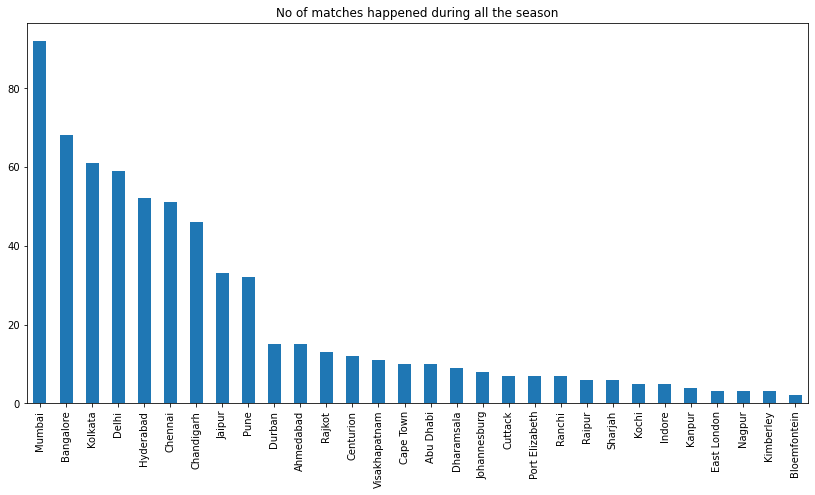

In [30]:
#Match venue during all the seasons  
df.city.value_counts().plot(kind='bar',figsize=(14,7), title='No of matches happened during all the season')

**Observation**
 - More than 80 matches where played in Mumbai during all the ipl seasons

### 4.2. Season

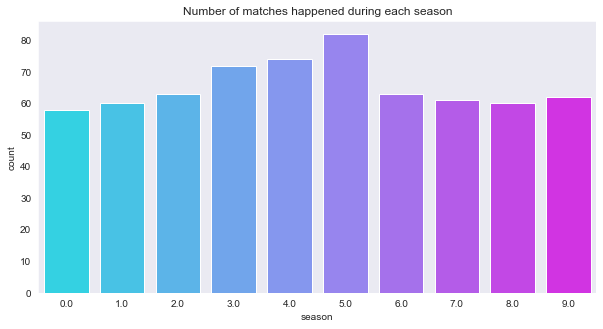

In [55]:
#Displaying no of matches happened during each season
sns.set_style('dark')
plt.figure(figsize=(10,5))
sns.countplot(x='season', data=df, palette="cool")
plt.title("Number of matches happened during each season")
plt.show()

**Observation**
 - Maximum no of matches were happened on 2013.

### 4.3. player_of_match

***Top 10 players who received more number of Player of the match during 2008 -2017***

<AxesSubplot:title={'center':'Top 10 players having highest POM during 2008-2017'}>

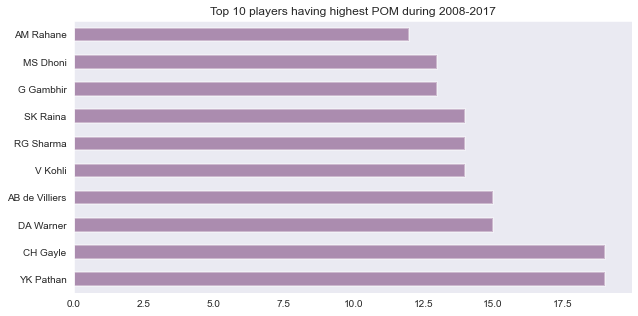

In [32]:
pof=df.player_of_match.value_counts().sort_values(ascending=False).head(10)
pof.plot(kind='barh', title="Top 10 players having highest POM during 2008-2017", 
         cmap='BuPu_r',
         alpha=0.4,  
         linewidth=2,
        figsize=(10,5))

In [33]:
df.columns

Index(['id', 'season', 'ball_1', 'city', 'date', 'dl_applied', 'over_1',
       'player_of_match', 'result', 'team1_1', 'toss_decision', 'toss_winner',
       'total_runs_1', 'umpire1', 'umpire2', 'venue', 'win_by_runs',
       'win_by_wickets', 'winner', 'ball_2', 'over_2', 'team2_2',
       'total_runs_2', 'run_rate_1', 'run_rate_2', 'net_rate_1', 'net_rate_2'],
      dtype='object')

 ### 4.4. Winner Vs Season

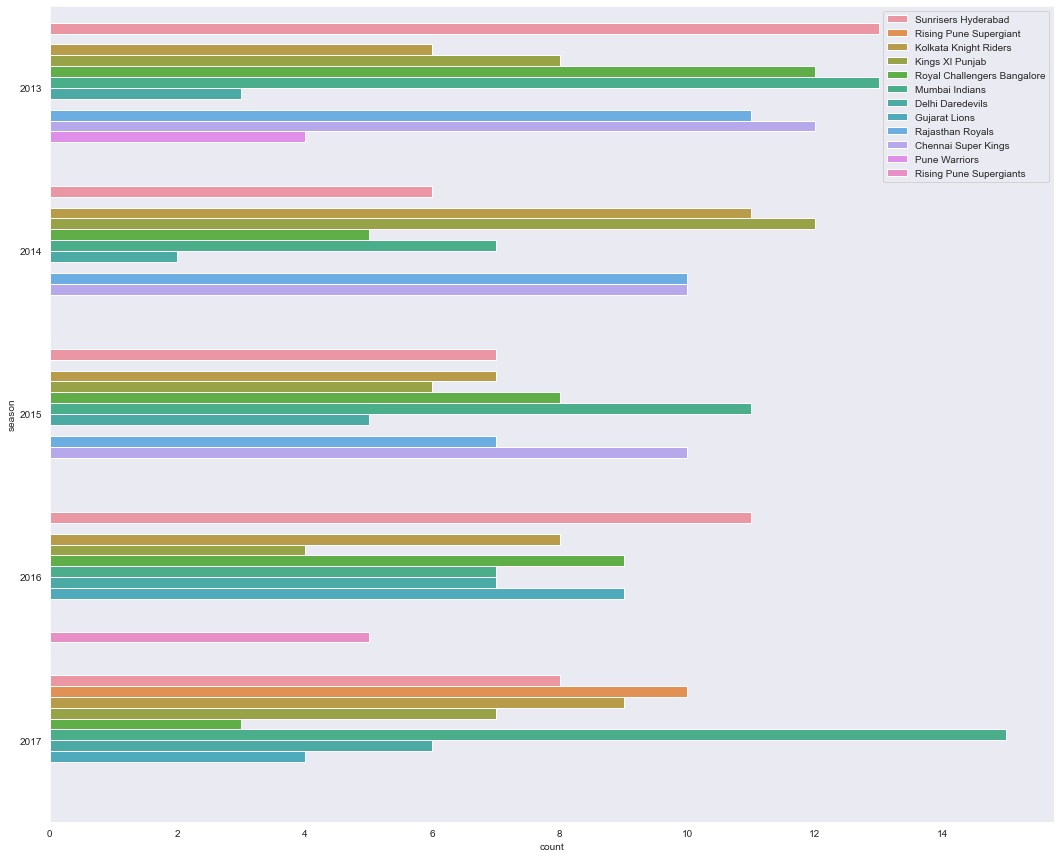

In [34]:
#Winner Vs Season
season_filter=df[(df['season']==2013) | (df['season']==2014) | (df['season']==2015) | (df['season']==2016) | (df['season']==2017)]
plt.figure(figsize=(18,15))
sns.countplot(data=season_filter, y='season', hue='winner')
plt.legend(loc='upper right')
plt.show()

### 4.5. Season Vs winner Vs First batting net run rate

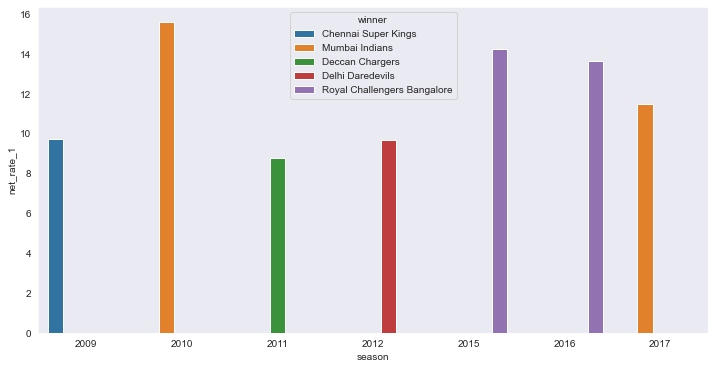

In [35]:
NRE_1st = df.groupby(['season','winner']).agg({'net_rate_1':sum})
NRE_1st = NRE_1st.apply(lambda x: x.sort_values(ascending=False).head(7))
NRE_1st = NRE_1st.reset_index().sort_values('season', ascending=True)

plt.figure(figsize=(12,6))
sns.barplot(x='season', y='net_rate_1', data=NRE_1st, hue='winner')
plt.show()

### 5. Label and Ordinal Encoding

In [36]:
#Segregating object features for encoding 
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,city,player_of_match,result,team1_1,toss_decision,toss_winner,umpire1,umpire2,venue,winner,team2_2
0,Hyderabad,Yuvraj Singh,normal,Sunrisers Hyderabad,field,Royal Challengers Bangalore,AY Dandekar,NJ Llong,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore
1,Pune,SPD Smith,normal,Mumbai Indians,field,Rising Pune Supergiant,A Nand Kishore,S Ravi,Maharashtra Cricket Association Stadium,Rising Pune Supergiant,Rising Pune Supergiant
2,Rajkot,CA Lynn,normal,Gujarat Lions,field,Kolkata Knight Riders,Nitin Menon,CK Nandan,Saurashtra Cricket Association Stadium,Kolkata Knight Riders,Kolkata Knight Riders
3,Indore,GJ Maxwell,normal,Rising Pune Supergiant,field,Kings XI Punjab,AK Chaudhary,C Shamshuddin,Holkar Cricket Stadium,Kings XI Punjab,Kings XI Punjab
4,Bangalore,KM Jadhav,normal,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,HDPK Dharmasena,SJA Taufel,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils


In [37]:
#Label encoding for all the label categories
lab_encoder = LabelEncoder()

def label(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = lab_encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in obj_df:
    label(obj_df[columns])
    
obj_df.head()

,city,player_of_match,result,team1_1,toss_decision,toss_winner,umpire1,umpire2,venue,winner,team2_2
0,13,199,1,13,1,12,5,23,23,13,12
1,24,176,1,7,1,10,1,33,16,10,10
2,26,30,1,3,1,6,27,11,25,6,6
3,14,56,1,10,1,4,2,9,11,4,4
4,2,84,1,12,0,12,17,37,14,12,2


In [38]:
#Ordinal Encoder for ordinal data 
encoder = OrdinalEncoder()

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

df['season'] = encode(df['season'])

In [39]:
df.drop(obj_df.columns,axis=1,inplace=True)

In [40]:
final_df = pd.concat([df,obj_df],axis=1)

In [41]:
final_df.drop(['date','id'],axis=1,inplace=True)

In [42]:
X=final_df.drop('winner',axis=1)
y=final_df[['winner']]

**The above chart shows our model is not totally biased. Hence we can proceed with the current sample data**

### 6. Data split - Train test split

In [43]:
#Train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 7. Feature scaling - Standardization

In [44]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,season,ball_1,dl_applied,over_1,total_runs_1,win_by_runs,win_by_wickets,ball_2,over_2,total_runs_2,...,city,player_of_match,result,team1_1,toss_decision,toss_winner,umpire1,umpire2,venue,team2_2
0,-0.523433,0.314689,-0.165683,0.294242,0.241209,-0.555522,0.778929,0.306993,0.136935,0.379887,...,0.703970,-1.414116,-0.200066,-0.203963,-1.148296,-0.194430,-0.056348,-0.360861,-0.059527,1.484559
1,1.278663,0.261753,-0.165683,0.294242,0.548397,-0.555522,0.194593,0.571138,0.411854,0.673094,...,1.945992,0.360920,-0.200066,-0.441995,-1.148296,-0.438165,-0.056348,0.109515,-1.337027,1.233134
2,0.557825,0.473498,-0.165683,0.294242,-0.010126,-0.555522,-0.974079,-4.755790,-4.811611,-3.645044,...,-1.655871,-0.316821,4.565146,0.748166,-1.148296,0.780510,-1.014428,-1.615199,1.217972,-0.023991
3,-0.523433,0.208816,-0.165683,0.294242,0.995215,-0.555522,0.778929,0.086872,0.411854,1.206197,...,-0.910658,0.586833,-0.200066,-1.394123,0.870855,-0.438165,-0.927330,1.285457,0.472764,-0.526841
4,1.639083,0.579371,-0.165683,0.294242,0.017800,-0.555522,-0.974079,0.306993,0.411854,0.139991,...,1.573386,-0.252274,4.565146,-0.680027,-1.148296,-0.681899,-1.362821,-0.988030,0.792139,0.227434


### 8. Model building

In [45]:
#Model using DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT_fit = DT.fit(x_train, y_train)
y_pred_DT = DT_fit.predict(x_test)
print('DT_score :', accuracy_score(y_test,y_pred_DT))

DT_score : 0.8244274809160306


In [46]:
#Model using RandomForestClassifier
RF = RandomForestClassifier()
RF_fit = RF.fit(x_train, y_train)
y_pred_RF = RF_fit.predict(x_test)
print('RF_score :', accuracy_score(y_test,y_pred_RF))

RF_score : 0.6259541984732825


In [47]:
#Model using KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN_fit = KNN.fit(X_scaled, y_train)
y_pred_KNN = KNN_fit.predict(x_test)
print('KNN_score :', accuracy_score(y_test,y_pred_KNN))

KNN_score : 0.10687022900763359


### 9. Hyper-parameter tuning

In [48]:
param_dict = {
    'criterion':['gini','entropy'],
    'max_depth': np.arange(3, 25),
    'min_samples_split' : range(10,500,10),
    'max_depth': range(1,30,2)
}

In [49]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(DT, param_grid = param_dict, cv = 10, verbose=True, n_jobs=-1)

In [51]:
# clf.fit(x_train,y_train)

In [ ]:
clf.best_params_

In [52]:
#Model using DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion= 'entropy',max_depth= 23, min_samples_split= 10)
DT_fit = DT.fit(x_train, y_train)
y_pred_DT = DT_fit.predict(x_test)
print('DT_score :', accuracy_score(y_test,y_pred_DT))

DT_score : 0.9312977099236641


### 11. Conclusion
 - We have successfully built a classification model to predict the Next year IPL winner with *'Decision Tree', 'Random Forest' and 'KNN'* algorithm. From those models *Decision tree* was able to classify data with best accuracy of 86% and KNN gives worst of 16%. Further tuning the Decision tree model gives the best accuracy of 94%.